# Exo 1

#### Using a logistic Regression to predict the output(estimated salary) taking into account the age

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pandas.plotting import scatter_matrix

In [2]:
def drawClasses(X_set,y_set,c1,c2,title_name,x_label,y_label,classes,classifier=None):
    from matplotlib.colors import ListedColormap
    plt.figure()

    X1, X2 = np.meshgrid(np.arange(start = X_set[:, c1].min() - 1, stop = X_set[:, c1].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, c2].min() - 1, stop = X_set[:, c2].max() + 1, step = 0.01))
    if classifier is not None:
        plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                     alpha = 0.25, cmap = ListedColormap(classes))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(classes)(i), label = j)
    plt.title('Classifier ({})'.format(title_name))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

In [3]:
# Importing the dataset
dataset = pd.read_csv('./datasets/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [4]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting classifier to the Training set
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [7]:
# Predicting the Test set results
y_preds = classifier.predict(X_test)

In [8]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_preds)
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

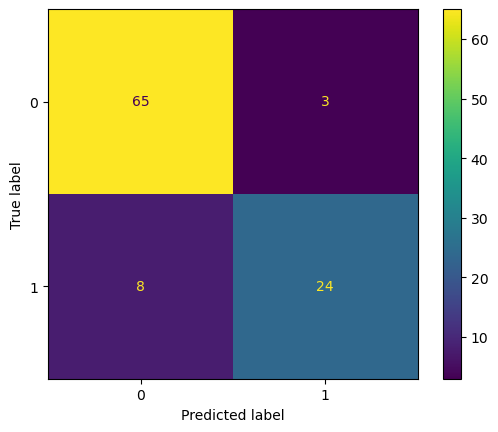

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)

disp.plot()
plt.show()

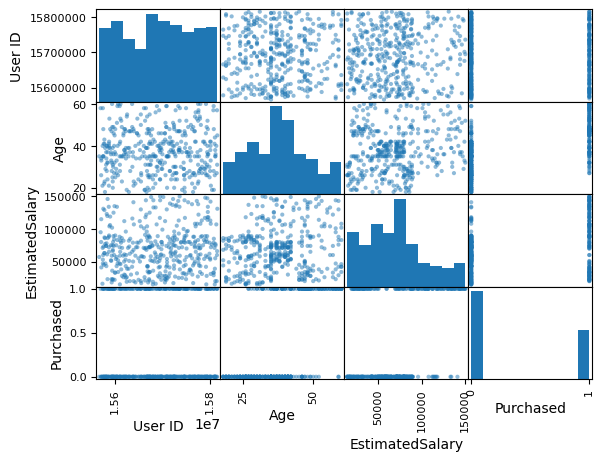

In [10]:
scatter_matrix(dataset);

In [11]:
classes=('red', 'green')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


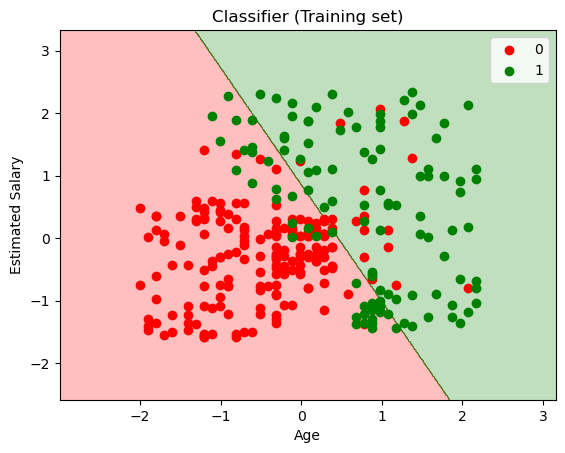

In [12]:
# Visualising the Training set results
drawClasses(X_train, y_train,0,1,'Training set','Age','Estimated Salary',classes,classifier)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


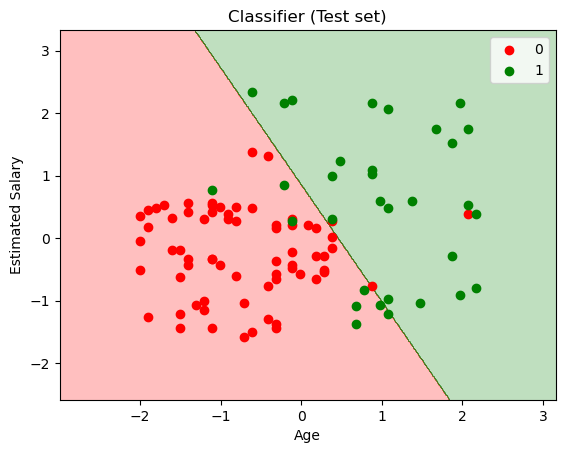

In [13]:
# Visualising the test set results
drawClasses(X_test, y_test,0,1,'Test set','Age','Estimated Salary',classes,classifier)

# Exo 2

#### Using a logistic Regression to predict wheter or not a patient has a diabete.

* pima-indians-diabetes dataset

In [14]:
filename = './datasets/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df1 = pd.read_csv(filename, names=names, delimiter=",")
df1.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
X = df1.drop('class', axis=1)
y = df1['class']

In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting classifier to the Training set
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=0)
model.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [18]:
# Predicting the Test set results
y_preds = model.predict(X_test)

In [19]:
model.score(X_test, y_test)

0.8020833333333334

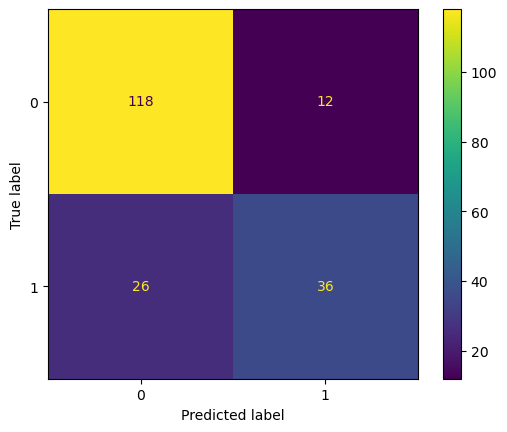

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot()
plt.show()

* Iris Plant dataset

In [21]:
filename = './datasets/iris_proc.data.csv'
names = ['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm', 'class']
df2 = pd.read_csv(filename, names=names, delimiter=",")
df2.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
X = df2.drop('class', axis=1)
y = df2['class']

In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [24]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting classifier to the Training set
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=0)
model.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [25]:
# Predicting the Test set results
y_preds = model.predict(X_test)

In [26]:
model.score(X_test, y_test)

0.9736842105263158

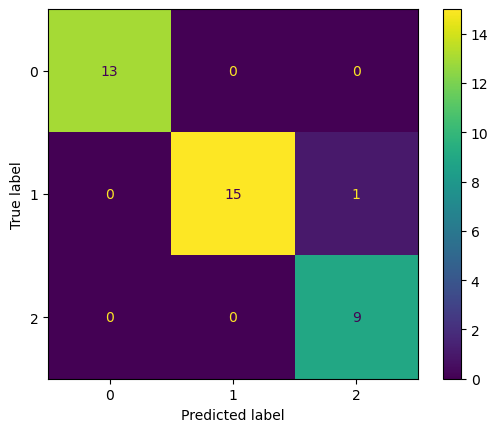

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot()
plt.show()

# Exo 3

#### This data set contains details of a bank's customers and the target variable is a binary variable(Exited) reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

In [3]:
# Importing the dataset
dataset = pd.read_csv('./datasets/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


* Data processing

In [4]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [5]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#label encoder uses number sequencing, new number for every category
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1]) #geography
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2]) #Gender

In [6]:
X[:, 2] 

array([0, 0, 0, ..., 0, 1, 0], dtype=object)

Là on va se transformer que la colonne Geography car la colonne Gender a déja les bonnes valeurs (que 0 et 1)

In [7]:
from sklearn.compose import ColumnTransformer
onehotencoder = ColumnTransformer([("Geography",OneHotEncoder(),[1])], remainder='passthrough')
X = onehotencoder.fit_transform(X)

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

* let's make the ANN!

In [10]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [11]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
800/800 [==============================] - 1s 692us/step - loss: 0.4866 - accuracy: 0.7960
Epoch 2/100
800/800 [==============================] - 1s 708us/step - loss: 0.4288 - accuracy: 0.7960
Epoch 3/100
800/800 [==============================] - 1s 705us/step - loss: 0.4243 - accuracy: 0.7960
Epoch 4/100
800/800 [==============================] - 1s 684us/step - loss: 0.4203 - accuracy: 0.8120
Epoch 5/100
800/800 [==============================] - 1s 963us/step - loss: 0.4172 - accuracy: 0.8244
Epoch 6/100
800/800 [==============================] - 1s 696us/step - loss: 0.4151 - accuracy: 0.8279
Epoch 7/100
800/800 [==============================] - 1s 663us/step - loss: 0.4133 - accuracy: 0.8309
Epoch 8/100
800/800 [==============================] - 1s 627us/step - loss: 0.4121 - accuracy: 0.8317
Epoch 9/100
800/800 [==============================] - 1s 661us/step - loss: 0.4109 - accuracy: 0.8335
Epoch 10/100
800/800 [==============================] - 1s 641us/step - l

800/800 [==============================] - 0s 609us/step - loss: 0.4005 - accuracy: 0.8354
Epoch 80/100
800/800 [==============================] - 0s 616us/step - loss: 0.4004 - accuracy: 0.8376
Epoch 81/100
800/800 [==============================] - 1s 669us/step - loss: 0.4005 - accuracy: 0.8342
Epoch 82/100
800/800 [==============================] - 0s 607us/step - loss: 0.4004 - accuracy: 0.8356
Epoch 83/100
800/800 [==============================] - 1s 643us/step - loss: 0.4004 - accuracy: 0.8340
Epoch 84/100
800/800 [==============================] - 1s 702us/step - loss: 0.4004 - accuracy: 0.8359
Epoch 85/100
800/800 [==============================] - 0s 620us/step - loss: 0.4007 - accuracy: 0.8361
Epoch 86/100
800/800 [==============================] - 0s 600us/step - loss: 0.4004 - accuracy: 0.8359
Epoch 87/100
800/800 [==============================] - 0s 590us/step - loss: 0.4007 - accuracy: 0.8346
Epoch 88/100
800/800 [==============================] - 0s 595us/step - loss:

* Making predictions and evaluating the model

In [13]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#y_pred = (y_pred > 0.5)
y_pred

array([[0.23424444],
       [0.31871197],
       [0.16049665],
       ...,
       [0.14699268],
       [0.13470355],
       [0.13201836]], dtype=float32)

In [41]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1499,   96],
       [ 184,  221]], dtype=int64)

## Exo 4

In [64]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

def preprocess_data(input_values):
    # Encoding categorical data
    labelencoder_1 = LabelEncoder()
    input_values[:, 1] = labelencoder_1.fit_transform(input_values[:, 1]) #geography
    labelencoder_2 = LabelEncoder()
    input_values[:, 2] = labelencoder_2.fit_transform(input_values[:, 2]) #Gender
    
    from sklearn.compose import ColumnTransformer
    onehotencoder = ColumnTransformer([("Geography",OneHotEncoder(),[1])], remainder='passthrough')
    input_values = onehotencoder.fit_transform(input_values)

    # Feature Scaling
    sc = StandardScaler()
    X_scaled = sc.fit_transform(input_values)
    
    return X_scaled

In [58]:
input_test ={
    'CreditScore' : 600,
    'Geography' : 'France',
    'Gender' : 'Male',
    'Age' : 40,
    'Tenure' : 3,
    'Balance' : 60000,
    'NumOfProducts' : 2,
    'HasCrCard' : 1,
    'IsActiveMember' : 1,
    'EstimatedSalary' : 50000
}

In [60]:
X = dataset.iloc[:, 3:13]
#df_input = pd.DataFrame([input_test])
df_input = X.append(input_test, ignore_index=True)

C:\Users\kwass\AppData\Local\Temp\ipykernel_2964\95131691.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_input = X.append(input_test, ignore_index=True)


In [65]:
test = preprocess_data(df_input.values)
test

array([[ 0.99710448, -0.57869729, -0.57377102, ...,  0.64604588,
         0.97014838,  0.02197385],
       [-1.00290393, -0.57869729,  1.74285554, ..., -1.54787768,
         0.97014838,  0.21662346],
       [ 0.99710448, -0.57869729, -0.57377102, ...,  0.64604588,
        -1.03077015,  0.2407769 ],
       ...,
       [-1.00290393,  1.72801916, -0.57377102, ...,  0.64604588,
        -1.03077015, -0.12514513],
       [ 0.99710448, -0.57869729, -0.57377102, ...,  0.64604588,
        -1.03077015, -1.07629565],
       [ 0.99710448, -0.57869729, -0.57377102, ...,  0.64604588,
         0.97014838, -0.87094264]])

In [78]:
inter = test[-1].reshape(1,12)
inter.shape

(1, 12)

In [79]:
y_pred = classifier.predict(inter)
y_pred

array([[0.03116116]], dtype=float32)

On conclut que cette personne n'a pas quitté la banque

## Exo 5

In [14]:
filename = './datasets/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df1 = pd.read_csv(filename, names=names, delimiter=",")
df1.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
X = df1.drop('class', axis=1).values
y = df1['class'].values

In [20]:
df1.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
df1.isna().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [17]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [21]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))

# Adding the second hidden layer
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
62/62 [==============================] - 0s 1ms/step - loss: 0.6888 - accuracy: 0.6433
Epoch 2/100
62/62 [==============================] - 0s 799us/step - loss: 0.6693 - accuracy: 0.6401
Epoch 3/100
62/62 [==============================] - 0s 784us/step - loss: 0.6183 - accuracy: 0.6401
Epoch 4/100
62/62 [==============================] - 0s 757us/step - loss: 0.5679 - accuracy: 0.6401
Epoch 5/100
62/62 [==============================] - 0s 719us/step - loss: 0.5475 - accuracy: 0.6401
Epoch 6/100
62/62 [==============================] - 0s 719us/step - loss: 0.5375 - accuracy: 0.6401
Epoch 7/100
62/62 [==============================] - 0s 720us/step - loss: 0.5302 - accuracy: 0.6401
Epoch 8/100
62/62 [==============================] - 0s 786us/step - loss: 0.5245 - accuracy: 0.6401
Epoch 9/100
62/62 [==============================] - 0s 859us/step - loss: 0.5209 - accuracy: 0.7378
Epoch 10/100
62/62 [==============================] - 0s 1ms/step - loss: 0.5180 - accuracy: 

62/62 [==============================] - 0s 778us/step - loss: 0.4631 - accuracy: 0.7834
Epoch 82/100
62/62 [==============================] - 0s 748us/step - loss: 0.4630 - accuracy: 0.7850
Epoch 83/100
62/62 [==============================] - 0s 738us/step - loss: 0.4623 - accuracy: 0.7850
Epoch 84/100
62/62 [==============================] - 0s 709us/step - loss: 0.4627 - accuracy: 0.7801
Epoch 85/100
62/62 [==============================] - 0s 763us/step - loss: 0.4616 - accuracy: 0.7834
Epoch 86/100
62/62 [==============================] - 0s 733us/step - loss: 0.4611 - accuracy: 0.7801
Epoch 87/100
62/62 [==============================] - 0s 725us/step - loss: 0.4620 - accuracy: 0.7801
Epoch 88/100
62/62 [==============================] - 0s 755us/step - loss: 0.4609 - accuracy: 0.7866
Epoch 89/100
62/62 [==============================] - 0s 726us/step - loss: 0.4607 - accuracy: 0.7785
Epoch 90/100
62/62 [==============================] - 0s 729us/step - loss: 0.4606 - accuracy: 

In [22]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [23]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[95, 12],
       [17, 30]], dtype=int64)